# MOL518 Homework 2

David Godovich  
2/13/2026

# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#a
data = np.loadtxt('HW2_data/ecoli_drugs.csv', delimiter = ',', skiprows=1)

In [3]:
#b
od_list = [data[:,1], data[:,2], data[:,3], data[:,4], data[:,5], data[:,6]]

In [4]:
#c
antibiotic_names = ["Rifampicin", "Novabiocin", "Trimethoprim", "Chloramphenicol", "Ampicillin", "Gentamycin"]

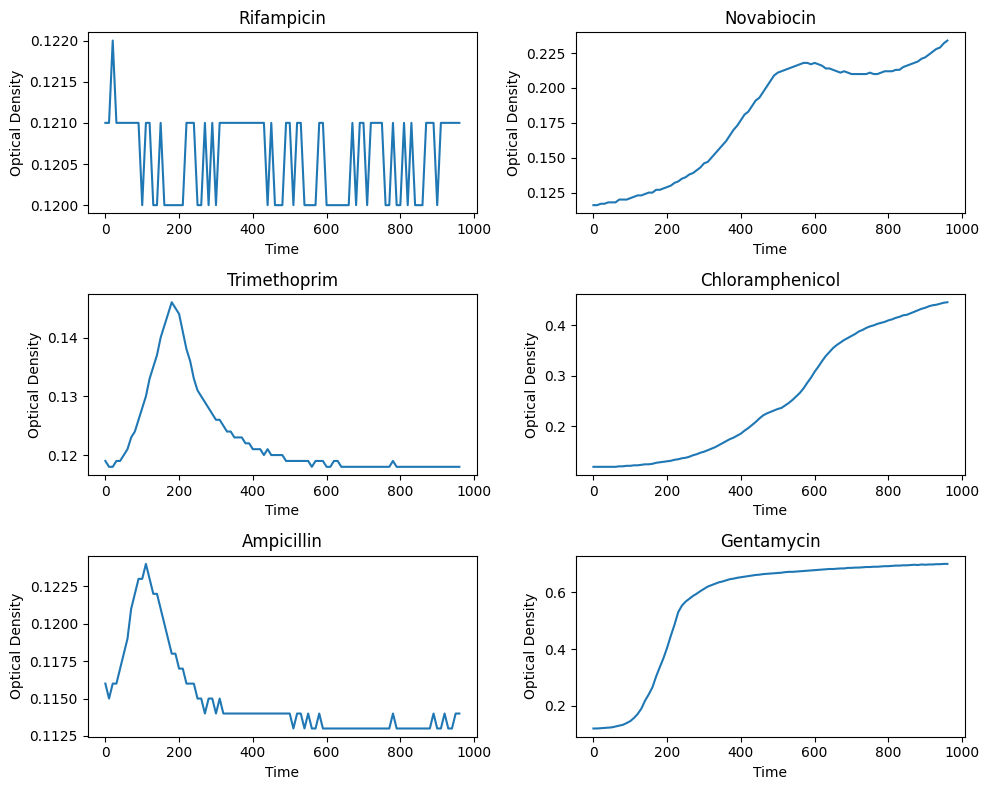

In [5]:
#d
fig, axes = plt.subplots(3,2, figsize=(10,8))
time = data[:,0]
for i, od in enumerate(od_list):
    name = antibiotic_names[i]
    cur_ax = axes.flatten()[i]
    cur_ax.plot(time,od)
    cur_ax.set_title(name)
    cur_ax.set_xlabel('Time')
    cur_ax.set_ylabel('Optical Density')

plt.tight_layout()
plt.show()

# Problem 2

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#a
data = np.loadtxt('HW2_data/mystery.csv', delimiter = ',', skiprows=1)
x, y = [data[:,0], data[:,1]]

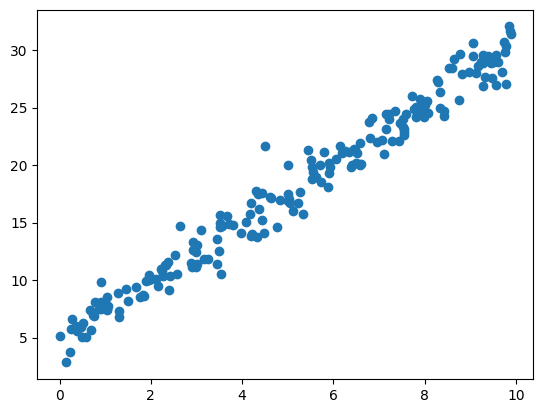

In [8]:
#b
plt.scatter(x, y)

In [9]:
#c
count = sum(y>5)
print('There are', count, 'entries greater than 5.')

There are 198 entries greater than 5.


In [10]:
#d
thresholds = [5, 10, 15, 20, 25]
n_above = [sum(y>i) for i in thresholds]

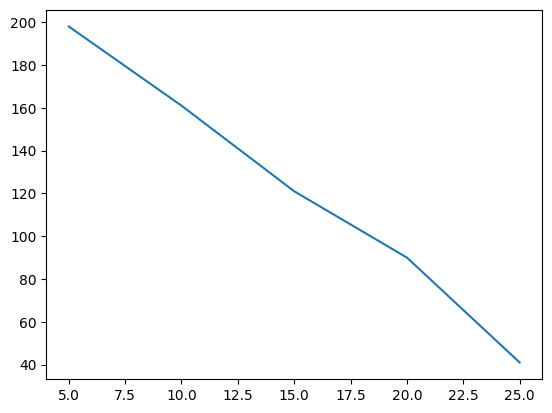

In [11]:
#e
plt.plot(thresholds, n_above)

In [12]:
#f
save_data = np.column_stack((thresholds, n_above))
np.savetxt('HW2_data/mystery_summary.csv', save_data, delimiter=',', 
           fmt = '%1f', header='threshold,n_above', comments='')

# Problem 3

In [13]:
import pathlib

In [14]:
images_path = pathlib.Path('./HW2_data/images/')

In [15]:
#a
img_list = list(images_path.glob('*.tif'))
print('Total count:',len(img_list))

Total count: 20


In [16]:
#b
sorted(img_list)[:5]

[PosixPath('HW2_data/images/2026-02-05_Bsubtilis_FtsZ-GFP_ctrl_FOV01.tif'),
 PosixPath('HW2_data/images/2026-02-05_Bsubtilis_FtsZ-GFP_ctrl_FOV02.tif'),
 PosixPath('HW2_data/images/2026-02-05_Bsubtilis_MreB-mCherry_chloramphenicol_FOV01.tif'),
 PosixPath('HW2_data/images/2026-02-05_Bsubtilis_MreB-mCherry_chloramphenicol_FOV02.tif'),
 PosixPath('HW2_data/images/2026-02-05_Bsubtilis_RpoD-GFP_stationary_FOV01.tif')]

In [17]:
#c
strains = [img.stem.split('_')[1] for img in img_list]
strains

['Paeruginosa',
 'Salmonella',
 'Salmonella',
 'Salmonella',
 'Salmonella',
 'Paeruginosa',
 'Paeruginosa',
 'Bsubtilis',
 'Ecoli',
 'Paeruginosa',
 'Bsubtilis',
 'Bsubtilis',
 'Ecoli',
 'Ecoli',
 'Bsubtilis',
 'Ecoli',
 'Bsubtilis',
 'Ecoli',
 'Salmonella',
 'Paeruginosa']

In [18]:
#d
{strain:strains.count(strain) for strain in strains}

{'Paeruginosa': 5, 'Salmonella': 5, 'Bsubtilis': 5, 'Ecoli': 5}

In [19]:
#d if I didn't use a dictionary
np.unique(strains, return_counts = True)

(array(['Bsubtilis', 'Ecoli', 'Paeruginosa', 'Salmonella'], dtype='<U11'),
 array([5, 5, 5, 5]))

# Problem 4

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#a
sox2_expression = np.loadtxt('HW2_data/SOX2_expression.csv', delimiter = ',', skiprows=1)

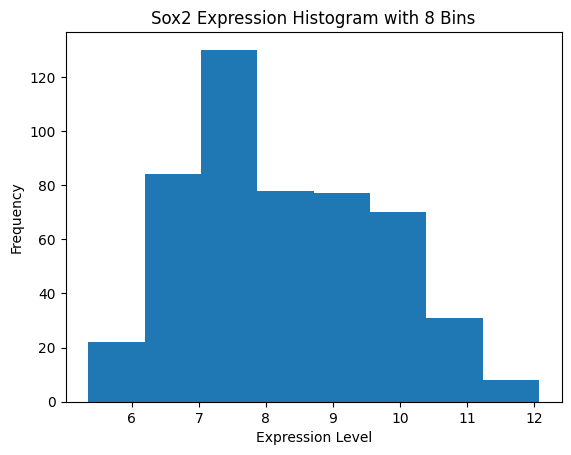

In [22]:
#b
plt.hist(sox2_expression, bins = 8)
plt.title("Sox2 Expression Histogram with 8 Bins")
plt.xlabel('Expression Level')
plt.ylabel('Frequency')
plt.show()

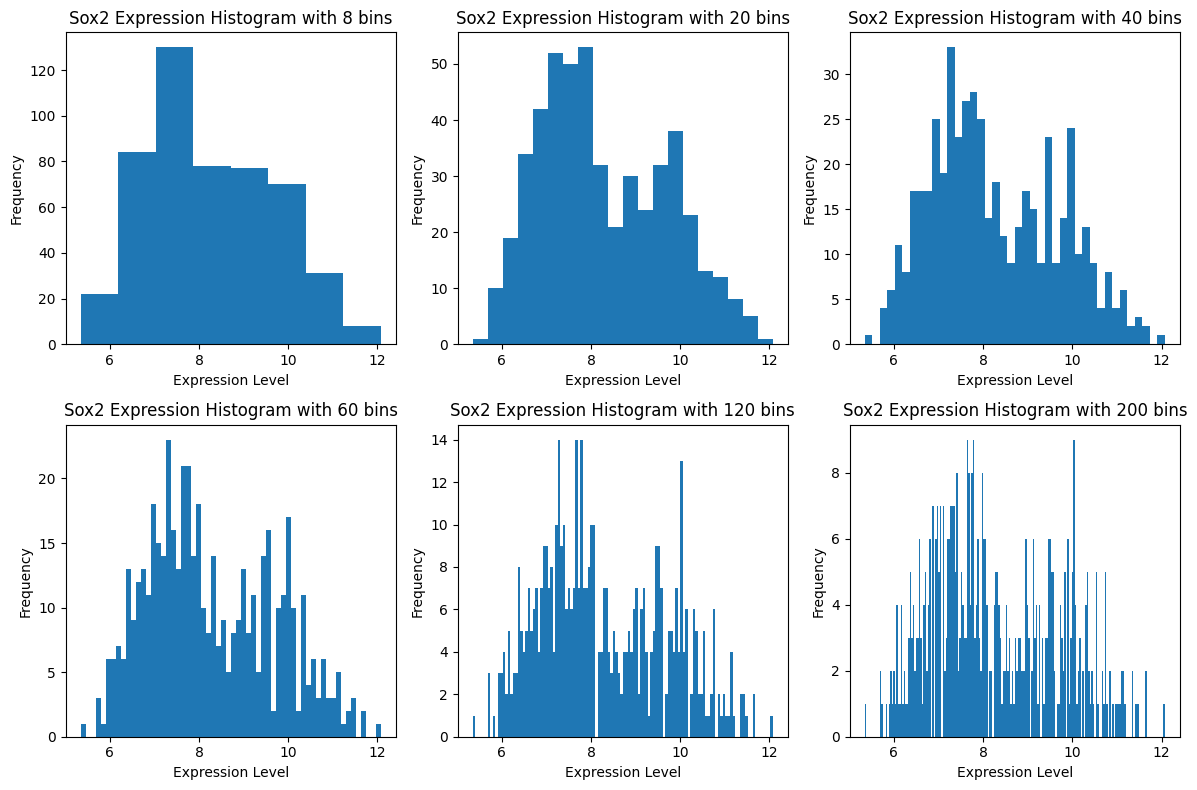

In [23]:
#c
fig, axes = plt.subplots(2,3,figsize=(12,8))
bins_list = [8, 20, 40, 60, 120, 200]

for i,bins in enumerate(bins_list):
    cur_ax = axes.flatten()[i]
    cur_ax.hist(sox2_expression, bins)
    cur_ax.set_title(f"Sox2 Expression Histogram with {bins} bins")
    cur_ax.set_xlabel("Expression Level")
    cur_ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### d
Using 8 bins makes the distribution look like it has a single peak around 7, while in every other binning a bimodal distribution with peaks at 7 and 10 is visible. Smaller bins above 60 fail to smooth over noise in the data.

# Problem 5

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#a
data = np.loadtxt('HW2_data/ecoli_growth_replicates.csv', delimiter = ',', skiprows=1)

time = data[:,0]
od_reps = data[:,1:]

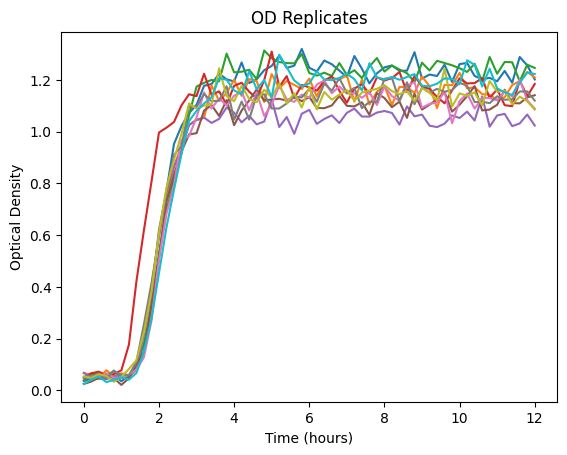

In [26]:
#b
plt.plot(time, od_reps)
plt.title('OD Replicates')
plt.xlabel('Time (hours)')
plt.ylabel('Optical Density')
plt.show()

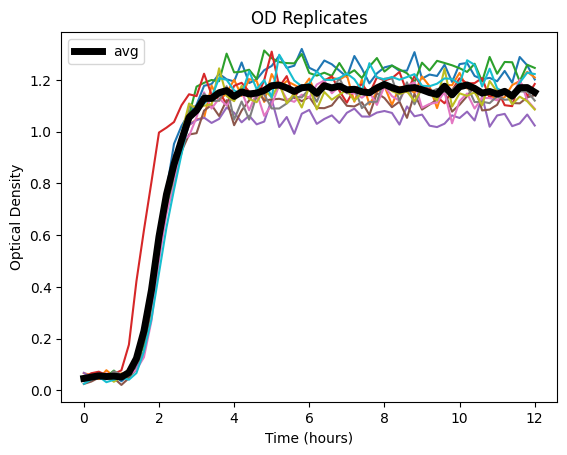

In [27]:
#c
mean_od = np.mean(od_reps, axis = 1)

#b
plt.plot(time, od_reps)
plt.plot(time,mean_od, 'k', linewidth = 5, label = 'avg')
plt.legend()
plt.title('OD Replicates')
plt.xlabel('Time (hours)')
plt.ylabel('Optical Density')
plt.show()

In [29]:
np.savetxt('HW2_data/ecoli_growth_mean.csv', np.column_stack((time, mean_od)),
           delimiter=',', fmt = '%f', header = 'time_hr,od_mean', comments = '')